In [22]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('INTC_23112020.csv')

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.200766,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.199160,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.203978,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.203175,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.195948,12172800
...,...,...,...,...,...,...,...
10256,2020-11-16,46.040001,46.750000,45.790001,46.189999,46.189999,36306300
10257,2020-11-17,45.750000,46.119999,45.410000,45.529999,45.529999,31118000
10258,2020-11-18,45.549999,45.689999,45.040001,45.060001,45.060001,32817900
10259,2020-11-19,44.919998,45.669998,44.700001,45.619999,45.619999,29469100


In [10]:
df.shape

(10261, 7)

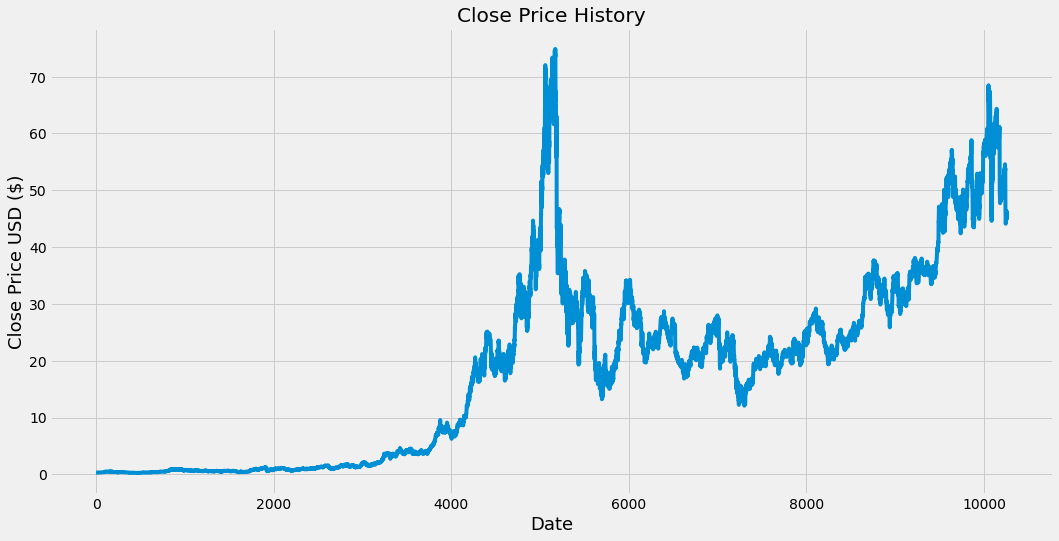

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [99]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#number of rows to train the data
training_data_len = math.ceil( len(dataset) *.8)
training_data_len


8209

In [114]:
#Scale the all of the data to be values between 0 and 1 
#minmax scaling brings the value to the specufied range
scaler = MinMaxScaler(feature_range=(0, 1)) 

#fit and transform the data
scaled_data = scaler.fit_transform(dataset)


10261

In [14]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
train_data

array([[0.001465  ],
       [0.00143012],
       [0.00153475],
       ...,
       [0.30249397],
       [0.29901149],
       [0.30048484]])

In [15]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
      print(x_train)
      print(y_train)
      print()

[array([0.001465  , 0.00143012, 0.00153475, 0.00151732, 0.00136035,
       0.00127315, 0.00129059, 0.00125571, 0.00111618, 0.00127315,
       0.00141268, 0.00143012, 0.001465  , 0.00137779, 0.00127315,
       0.00129059, 0.00120339, 0.00118595, 0.00118595, 0.00122083,
       0.0011685 , 0.00101155, 0.00094178, 0.00099411, 0.00095922,
       0.00113362, 0.00137779, 0.00139524, 0.00132547, 0.00129059,
       0.00132547, 0.00137779, 0.00139524, 0.001465  , 0.00151732,
       0.00149988, 0.00149988, 0.00144756, 0.00149988, 0.00148244,
       0.00156963, 0.0016394 , 0.00167428, 0.0017266 , 0.00174404,
       0.00169172, 0.00158707, 0.00153475, 0.00169172, 0.00167428,
       0.00177892, 0.00177892, 0.00184869, 0.00186613, 0.00174404,
       0.00181381, 0.00181381, 0.00177892, 0.00174404, 0.00179636])]
[0.0018486889713040596]



In [16]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(8149, 60)

In [17]:
#Reshape the data
#2d into 3d
#Samples,Timesteps, Features
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(8149, 60, 1)

In [18]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [19]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')#loss = 'root_mean_squared_error'

In [20]:
model.fit(x_train, y_train, batch_size=1, epochs=40)

Epoch 1/40
8149/8149 [==============================] - 223s 27ms/step - loss: 5.1223e-04
Epoch 2/40
8149/8149 [==============================] - 222s 27ms/step - loss: 2.5549e-04
Epoch 3/40
8149/8149 [==============================] - 222s 27ms/step - loss: 2.0698e-04
Epoch 4/40
8149/8149 [==============================] - 218s 27ms/step - loss: 1.6399e-04
Epoch 5/40
8149/8149 [==============================] - 217s 27ms/step - loss: 1.5993e-04
Epoch 6/40
8149/8149 [==============================] - 222s 27ms/step - loss: 1.5371e-04
Epoch 7/40
8149/8149 [==============================] - 218s 27ms/step - loss: 1.4397e-04
Epoch 8/40
8149/8149 [==============================] - 217s 27ms/step - loss: 1.3025e-04
Epoch 9/40
8149/8149 [==============================] - 220s 27ms/step - loss: 1.2232e-04
Epoch 10/40
8149/8149 [==============================] - 217s 27ms/step - loss: 1.2458e-04
Epoch 11/40
8149/8149 [==============================] - 216s 26ms/step - loss: 1.3030e-04
Epoch 12

In [26]:
#serilizin the model to json
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
#serilizeing the model to HDF5    
model.save_weights("model.h5")
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

#the above code helps to save time it loads the model into json file so we don't want to wait till the 40 epochs

    

In [109]:
#Creating Test data set
#new array containing values from 1551 to 2020


In [142]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]  
for i in range(60,len(scaled_data)):
    x_test.append(scaled_data[i-60:i,0])


In [126]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [127]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [128]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)


/home/venkatsakthi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/venkatsakthi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/venkatsakthi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

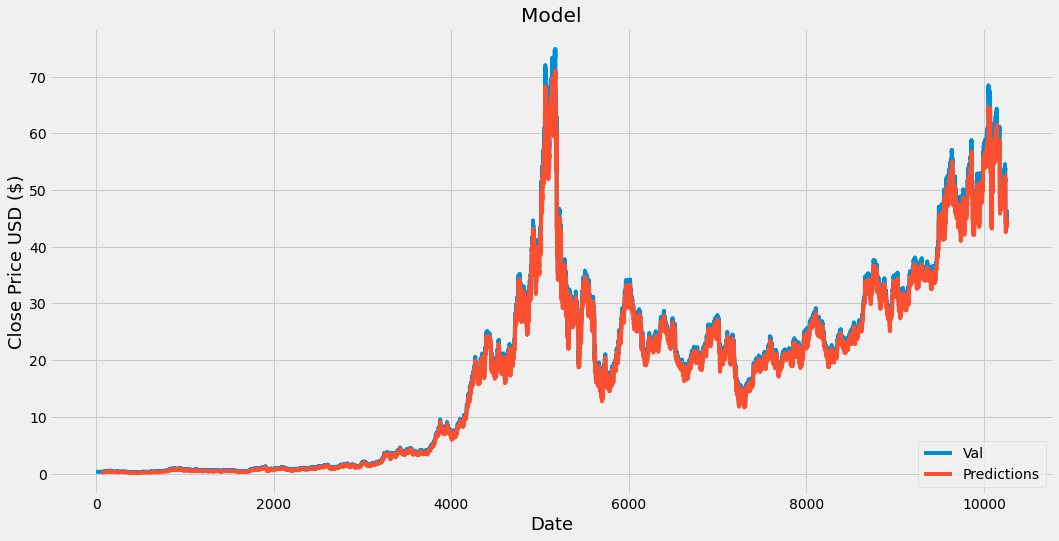

In [134]:
#Plot the data for the graph
data = df.filter(['Close'])
Dates = df.filter(['Date'])
Adj_close = df.filter(['Adj Close'])
valid = data[60:]
valid['Predictions'] = predictions
valid['Date'] = Dates
valid['Adj Close'] = Adj_close

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data)
plt.plot(valid[['Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

,Date,Close,Adj Close,Predictions
60,1980-06-11,0.354167,0.218434,0.217988
61,1980-06-12,0.348958,0.215221,0.221077
62,1980-06-13,0.348958,0.215221,0.216838
63,1980-06-16,0.348958,0.215221,0.217216
64,1980-06-17,0.347656,0.214418,0.216731
...,...,...,...,...
10256,2020-11-16,46.189999,46.189999,43.838310
10257,2020-11-17,45.529999,45.529999,44.841213
10258,2020-11-18,45.060001,45.060001,44.033585
10259,2020-11-19,45.619999,45.619999,43.576210


In [137]:
#
valid
dataframe = valid
dataframe.reset_index(drop=True)
dataframe = valid.reindex(['Date','Close','Adj Close','Predictions'],axis=1)

#converting the file to csv file 
dataframe.to_csv('sep4.csv',index = False)
data_of_prediction = pd.read_csv('sep4.csv')
data_of_prediction

,Date,Close,Adj Close,Predictions
0,1980-06-11,0.354167,0.218434,0.217988
1,1980-06-12,0.348958,0.215221,0.221077
2,1980-06-13,0.348958,0.215221,0.216838
3,1980-06-16,0.348958,0.215221,0.217216
4,1980-06-17,0.347656,0.214418,0.216731
...,...,...,...,...
10196,2020-11-16,46.189999,46.189999,43.838310
10197,2020-11-17,45.529999,45.529999,44.841213
10198,2020-11-18,45.060001,45.060001,44.033585
10199,2020-11-19,45.619999,45.619999,43.576210


In [138]:

infosys_quote = pd.read_csv('INTC_23112020.csv')
#Create a new dataframe
new_df = infosys_quote.filter(['Close'])

#Getting the last 60 day closing price 
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[43.969677]]


In [161]:
test_data = scaled_data[training_data_len - 60: , : ]
pred = []
actual = dataset[training_data_len: , :]
for i in range(60,len(test_data)):
    pred.append(test_data[i-60:i,0])
pred = np.array(pred)

In [162]:
pred = np.reshape(pred,(pred.shape[0],pred.shape[1],1))

In [164]:
predicts = model.predict(pred)
predicts = scaler.inverse_transform(predicts)

In [167]:
import sklearn
#all errors values in rounded manner
RMSE =round(np.sqrt(np.mean(((predicts - actual)**2))))
print("RMSE-->",RMSE)
MAE = round(sklearn.metrics.mean_absolute_error(actual, predicts))
print("MAE-->",MAE)
EVS = round(sklearn.metrics.explained_variance_score(actual,predicts))
print("EVS-->",EVS)
RSQ = round(sklearn.metrics.r2_score(actual,predicts))
print("RSQ-->",RSQ)
MSE = round(sklearn.metrics.mean_squared_error(actual,predicts))
print("MSE-->",MSE)




RMSE--> 2
MAE--> 1
EVS--> 1
RSQ--> 1
MSE--> 2


In [168]:
#all errors values in without rounded manner
RMSE =np.sqrt(np.mean(((predicts - actual)**2)))
print("RMSE-->",RMSE)
MAE = sklearn.metrics.mean_absolute_error(actual, predicts)
print("MAE-->",MAE)
EVS = sklearn.metrics.explained_variance_score(actual,predicts)
print("EVS-->",EVS)
RSQ = sklearn.metrics.r2_score(actual,predicts)
print("RSQ-->",RSQ)
MSE = sklearn.metrics.mean_squared_error(actual,predicts)
print("MSE-->",MSE)

RMSE--> 1.5753921099977277
MAE--> 1.3021939659687363
EVS--> 0.993104980321963
RSQ--> 0.9816859157836471
MSE--> 2.481860300243093
